# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

##### *Disini saya menggunakan dataset dari kaggle yaitu Earthquakes 2023 Global, dimana dataset tersebut memiliki 26.642 baris dan 22 kolom. Dataset ini berisi informasi tentang kejadian gempa bumi di seluruh dunia pada tahun 2023.*

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd  # Mengimpor pustaka pandas untuk manipulasi dan analisis data
import numpy as np # Mengimpor pustaka numpy untuk operasi numerik
import seaborn as sns  # Mengimpor pustaka seaborn untuk visualisasi data
import matplotlib.pyplot as plt  # Mengimpor pustaka matplotlib untuk visualisasi grafik
from yellowbrick.cluster import KElbowVisualizer  # Mengimpor KElbowVisualizer untuk visualisasi metode Elbow

from sklearn.decomposition import PCA # Mengimpor PCA untuk reduksi dimensi
from sklearn.preprocessing import StandardScaler  # Mengimpor StandardScaler untuk standarisasi data
from sklearn.cluster import KMeans  # Mengimpor algoritma KMeans  untuk clustering
from sklearn.metrics import silhouette_score  # Mengimpor silhouette_score untuk mengevaluasi hasil clustering

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
# Membaca dataset earthquakes tahun 2023 dari kaggle dan menampilkan 5 baris pertama
df = pd.read_csv('earthquakes_2023_global.csv')
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-01-01T00:49:25.294Z,52.0999,178.5218,82.770,3.10,ml,14.0,139.0,0.8700,0.18,...,2023-03-11T22:51:52.040Z,"Rat Islands, Aleutian Islands, Alaska",earthquake,8.46,21.213,0.097,14.0,reviewed,us,us
1,2023-01-01T01:41:43.755Z,7.1397,126.7380,79.194,4.50,mb,32.0,104.0,1.1520,0.47,...,2023-03-11T22:51:45.040Z,"23 km ESE of Manay, Philippines",earthquake,5.51,7.445,0.083,43.0,reviewed,us,us
2,2023-01-01T03:29:31.070Z,19.1631,-66.5251,24.000,3.93,md,23.0,246.0,0.8479,0.22,...,2023-03-11T22:51:29.040Z,Puerto Rico region,earthquake,0.91,15.950,0.090,16.0,reviewed,pr,pr
3,2023-01-01T04:09:32.814Z,-4.7803,102.7675,63.787,4.30,mb,17.0,187.0,0.4570,0.51,...,2023-03-11T22:51:45.040Z,"99 km SSW of Pagar Alam, Indonesia",earthquake,10.25,6.579,0.238,5.0,reviewed,us,us
4,2023-01-01T04:29:13.793Z,53.3965,-166.9417,10.000,3.00,ml,19.0,190.0,0.4000,0.31,...,2023-03-11T22:51:38.040Z,"59 km SSW of Unalaska, Alaska",earthquake,1.41,1.999,0.085,18.0,reviewed,us,us


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
# Menampilkan informasi tentang dataset, termasuk jumlah baris, kolom, tipe data, dan jumlah nilai non-null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26642 entries, 0 to 26641
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             26642 non-null  object 
 1   latitude         26642 non-null  float64
 2   longitude        26642 non-null  float64
 3   depth            26642 non-null  float64
 4   mag              26642 non-null  float64
 5   magType          26642 non-null  object 
 6   nst              25227 non-null  float64
 7   gap              25225 non-null  float64
 8   dmin             24776 non-null  float64
 9   rms              26642 non-null  float64
 10  net              26642 non-null  object 
 11  id               26642 non-null  object 
 12  updated          26642 non-null  object 
 13  place            25034 non-null  object 
 14  type             26642 non-null  object 
 15  horizontalError  25093 non-null  float64
 16  depthError       26642 non-null  float64
 17  magError    

In [3]:
# Memeriksa jumlah nilai yang hilang di setiap fitur
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

nst                1415
gap                1417
dmin               1866
place              1608
horizontalError    1549
magError           1672
magNst             1577
dtype: int64

In [5]:
# Menampilkan statistik deskriptif dari dataset untuk fitur numerik
df.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,26642.000000,26642.000000,26642.000000,26642.000000,25227.000000,25225.000000,24776.000000,26642.000000,25093.000000,26642.000000,24970.000000,25065.000000
mean,16.852798,-11.487497,67.491224,4.007395,42.571332,124.930971,2.692908,0.581575,7.017267,4.475056,0.122735,33.315939
std,30.389200,130.053399,116.762456,0.794423,37.662352,67.430145,4.043568,0.256276,4.072365,4.451649,0.102271,48.022567
min,-65.849700,-179.998700,-3.370000,2.600000,0.000000,8.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000
25%,-6.415275,-149.608650,10.000000,3.220000,19.000000,73.000000,0.612000,0.410000,4.140000,1.848000,0.080000,10.000000
50%,18.884167,-64.811833,21.998000,4.300000,30.000000,111.000000,1.579000,0.590000,7.060000,2.019000,0.111000,18.000000
75%,41.827950,126.965100,66.833000,4.500000,52.000000,165.000000,3.172000,0.750000,9.730000,6.669000,0.150000,36.000000
max,86.593900,179.999400,681.238000,7.800000,423.000000,350.000000,50.820000,1.880000,99.000000,60.670000,4.490000,884.000000


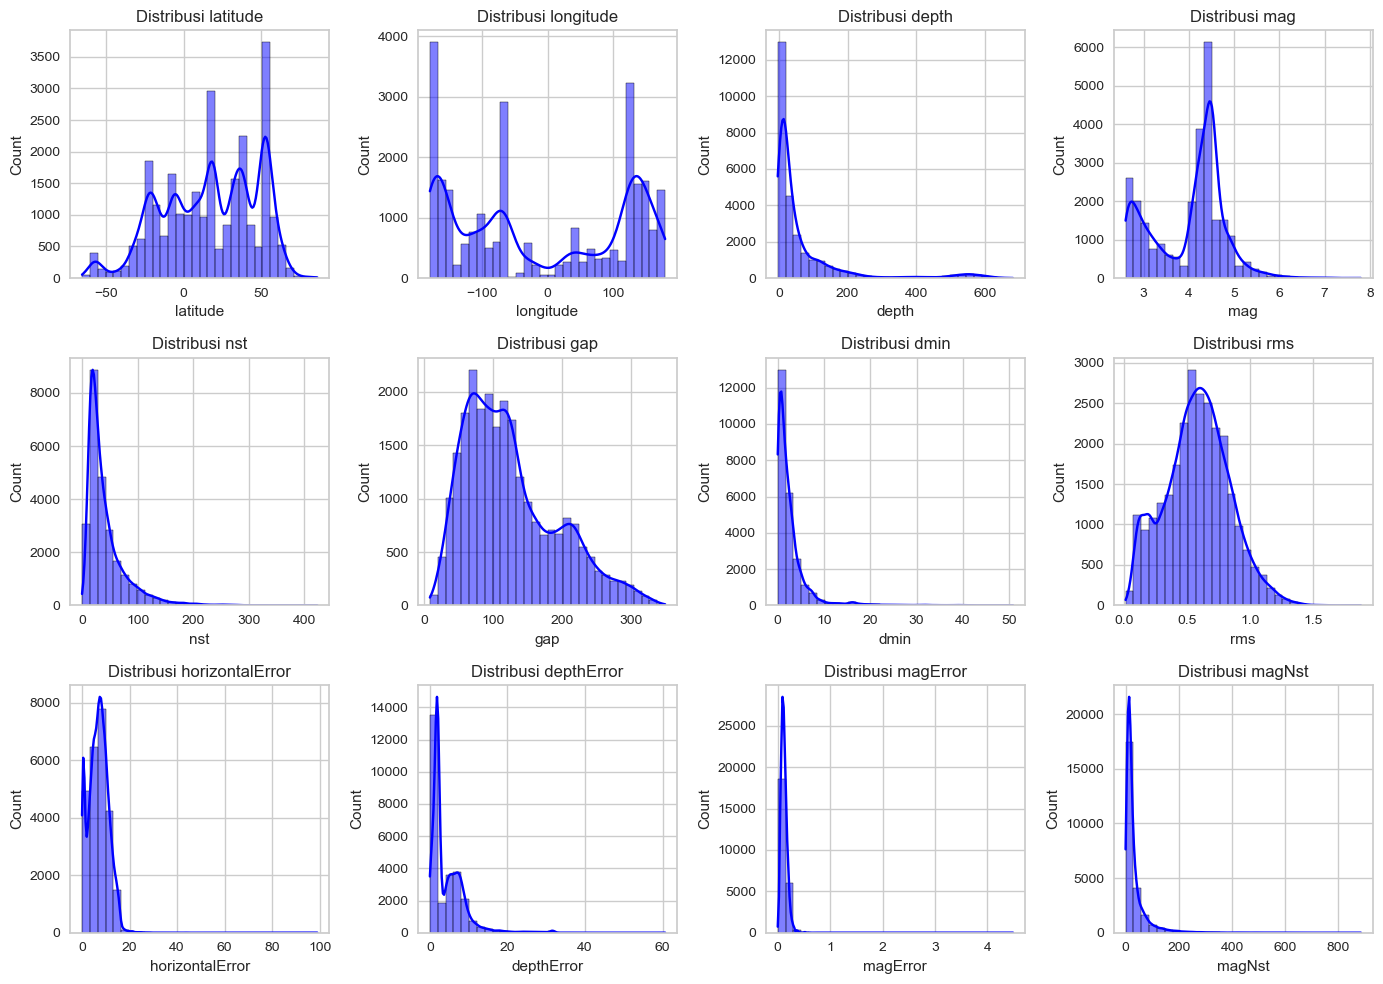

In [10]:
# Distribusi fitur numerik
num_features = df.select_dtypes(include=[np.number])
plt.figure(figsize=(14, 10))
for i, column in enumerate(num_features.columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df[column], bins=30, kde=True, color='blue')
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

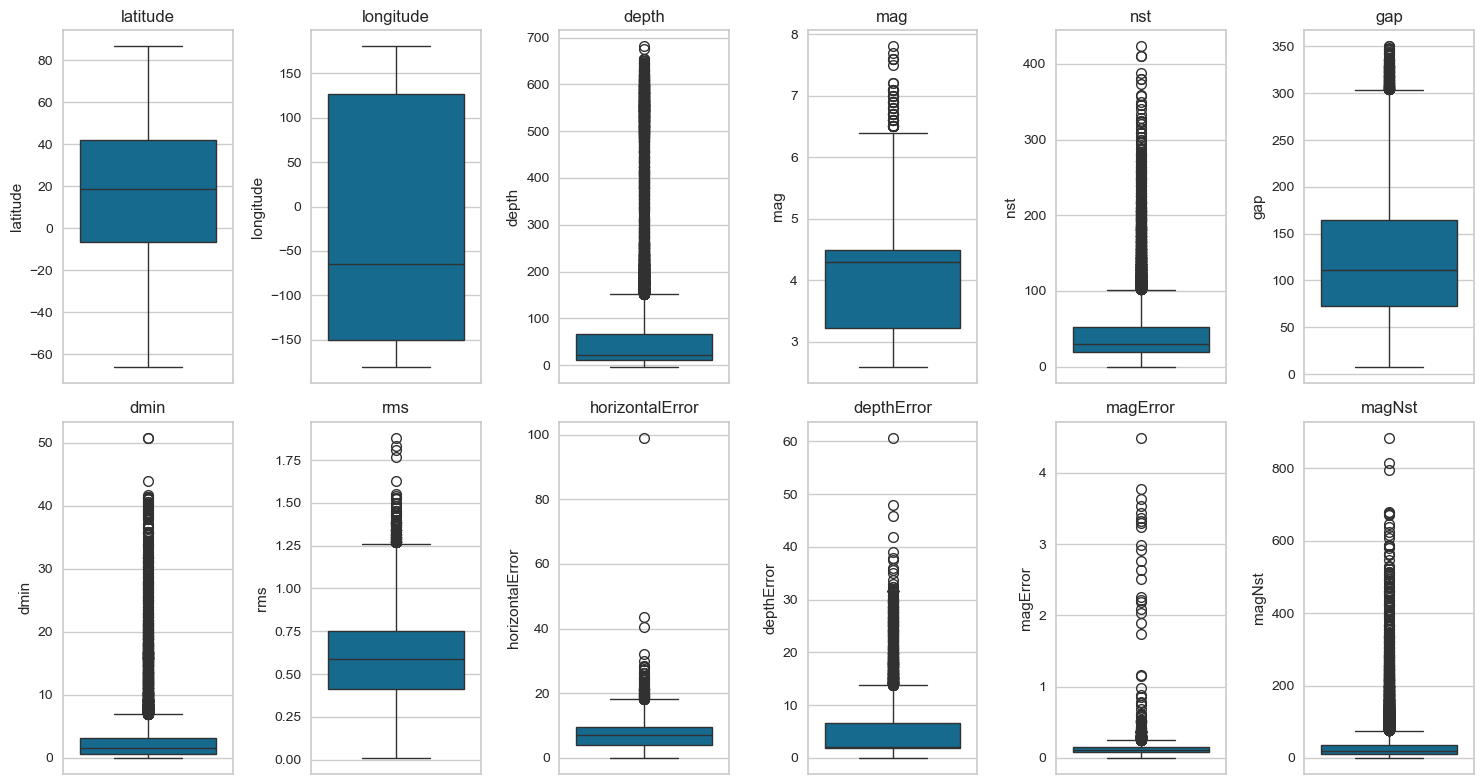

In [17]:
# Mengidentifikasi outlier untuk fitur numerik
plt.figure(figsize=(15, 8))
for i, feature in enumerate(num_features, 1):
    plt.subplot(2, 6, i)
    sns.boxplot(y=df[feature]) 
    plt.title(feature) 
plt.tight_layout()
plt.show()

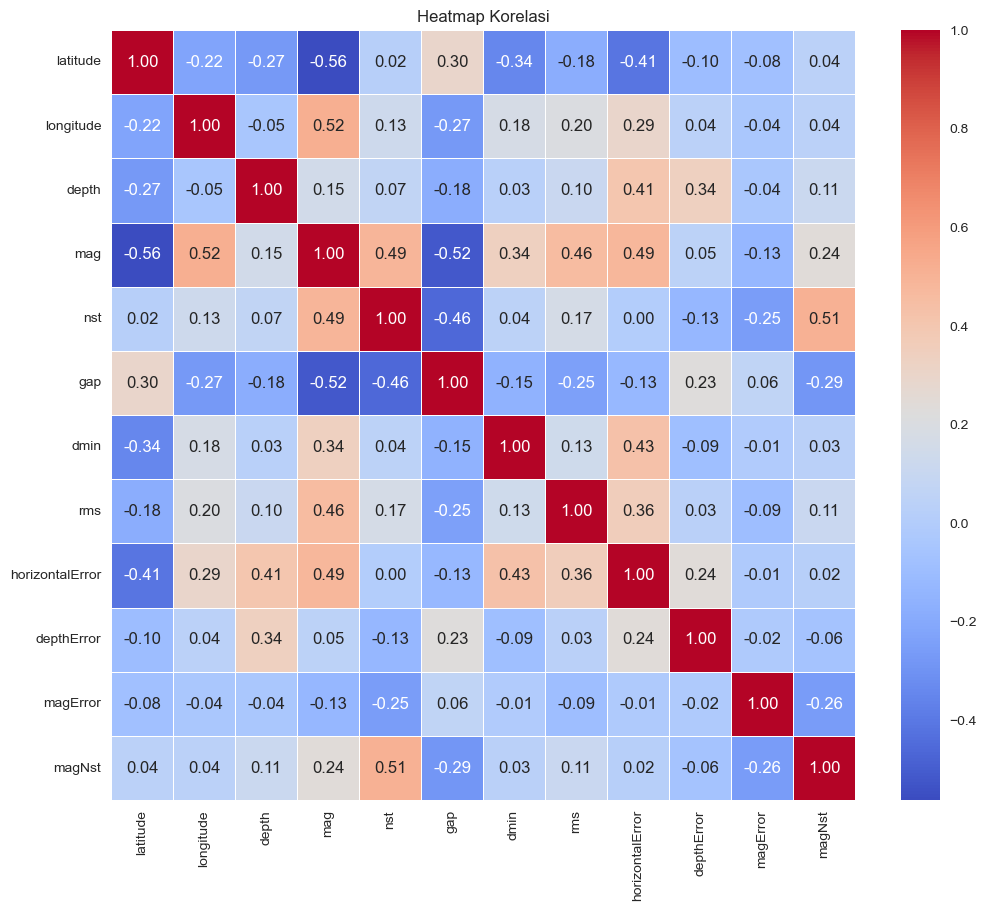

In [11]:
# Heatmap korelasi untuk fitur numerik
plt.figure(figsize=(12, 10))
correlation_matrix = num_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi')
plt.show()

In [12]:
# Menampilkan statistik deskriptif dari dataset untuk fitur kategorikal
df.describe(include='object')

,time,magType,net,id,updated,place,type,status,locationSource,magSource
count,26642,26642,26642,26642,26642,25034,26642,26642,26642,26642
unique,24682,15,15,24682,7847,14811,8,2,16,19
top,2023-04-06T01:08:20.773Z,mb,us,us6000k40m,2023-10-17T22:01:29.040Z,"Izu Islands, Japan region",earthquake,reviewed,us,us
freq,2,15906,21411,2,97,358,26428,26566,21409,21249


C:\Users\septi\AppData\Local\Temp\ipykernel_1952\2007692567.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[feature], order=df[feature].value_counts().index, palette='viridis')
C:\Users\septi\AppData\Local\Temp\ipykernel_1952\2007692567.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[feature], order=df[feature].value_counts().index, palette='viridis')
C:\Users\septi\AppData\Local\Temp\ipykernel_1952\2007692567.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[feature], order=df[feature].value_counts().index, pa

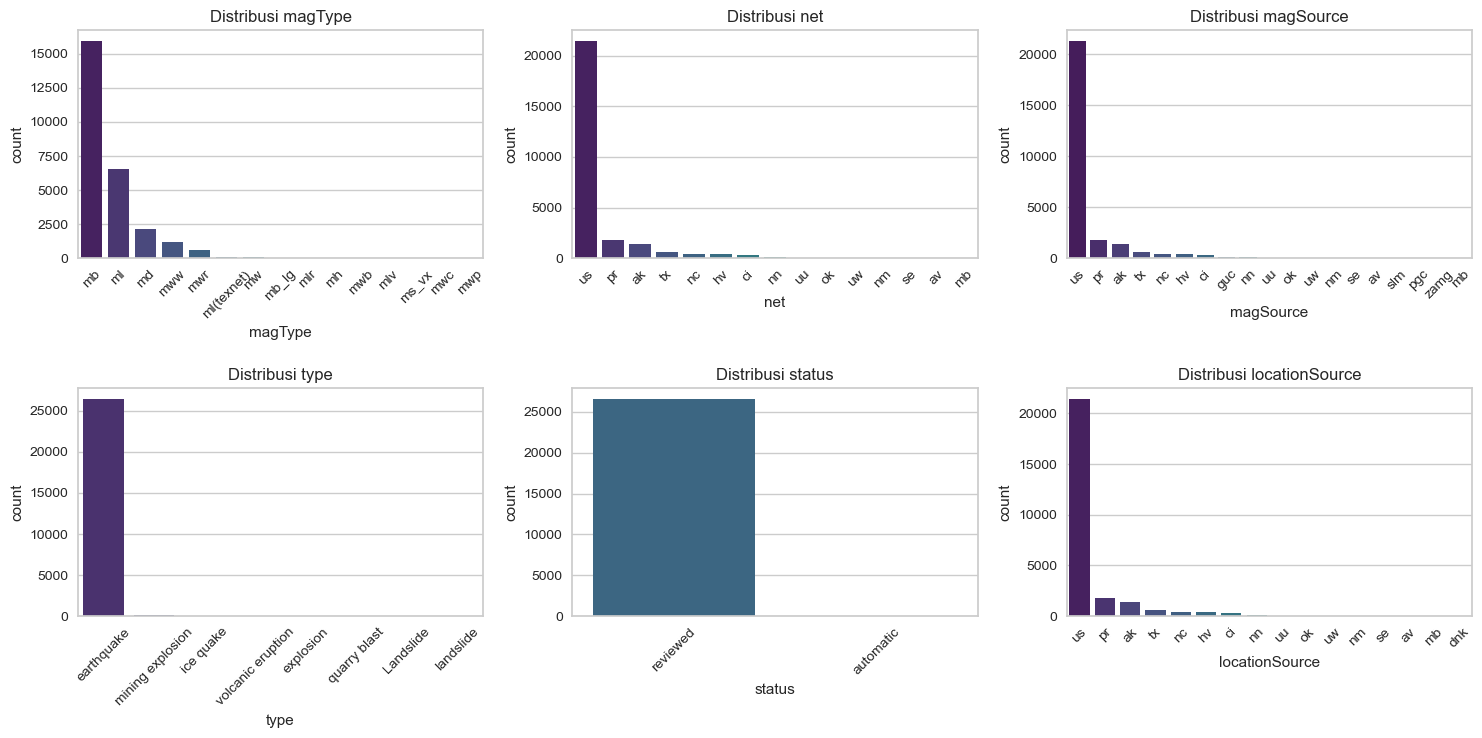

In [13]:
# Distribusi fitur kategorikal
cat_features = ['magType', 'net', 'magSource', 'type', 'status', 'locationSource']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(cat_features, 1):
    plt.subplot(3, 3, i) 
    sns.countplot(x=df[feature], order=df[feature].value_counts().index, palette='viridis')
    plt.title(f'Distribusi {feature}')
    plt.xticks(rotation=45)  
plt.tight_layout() 
plt.show()

C:\Users\septi\AppData\Local\Temp\ipykernel_1952\4075425978.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_values.values, y=top_values.index, palette='viridis')


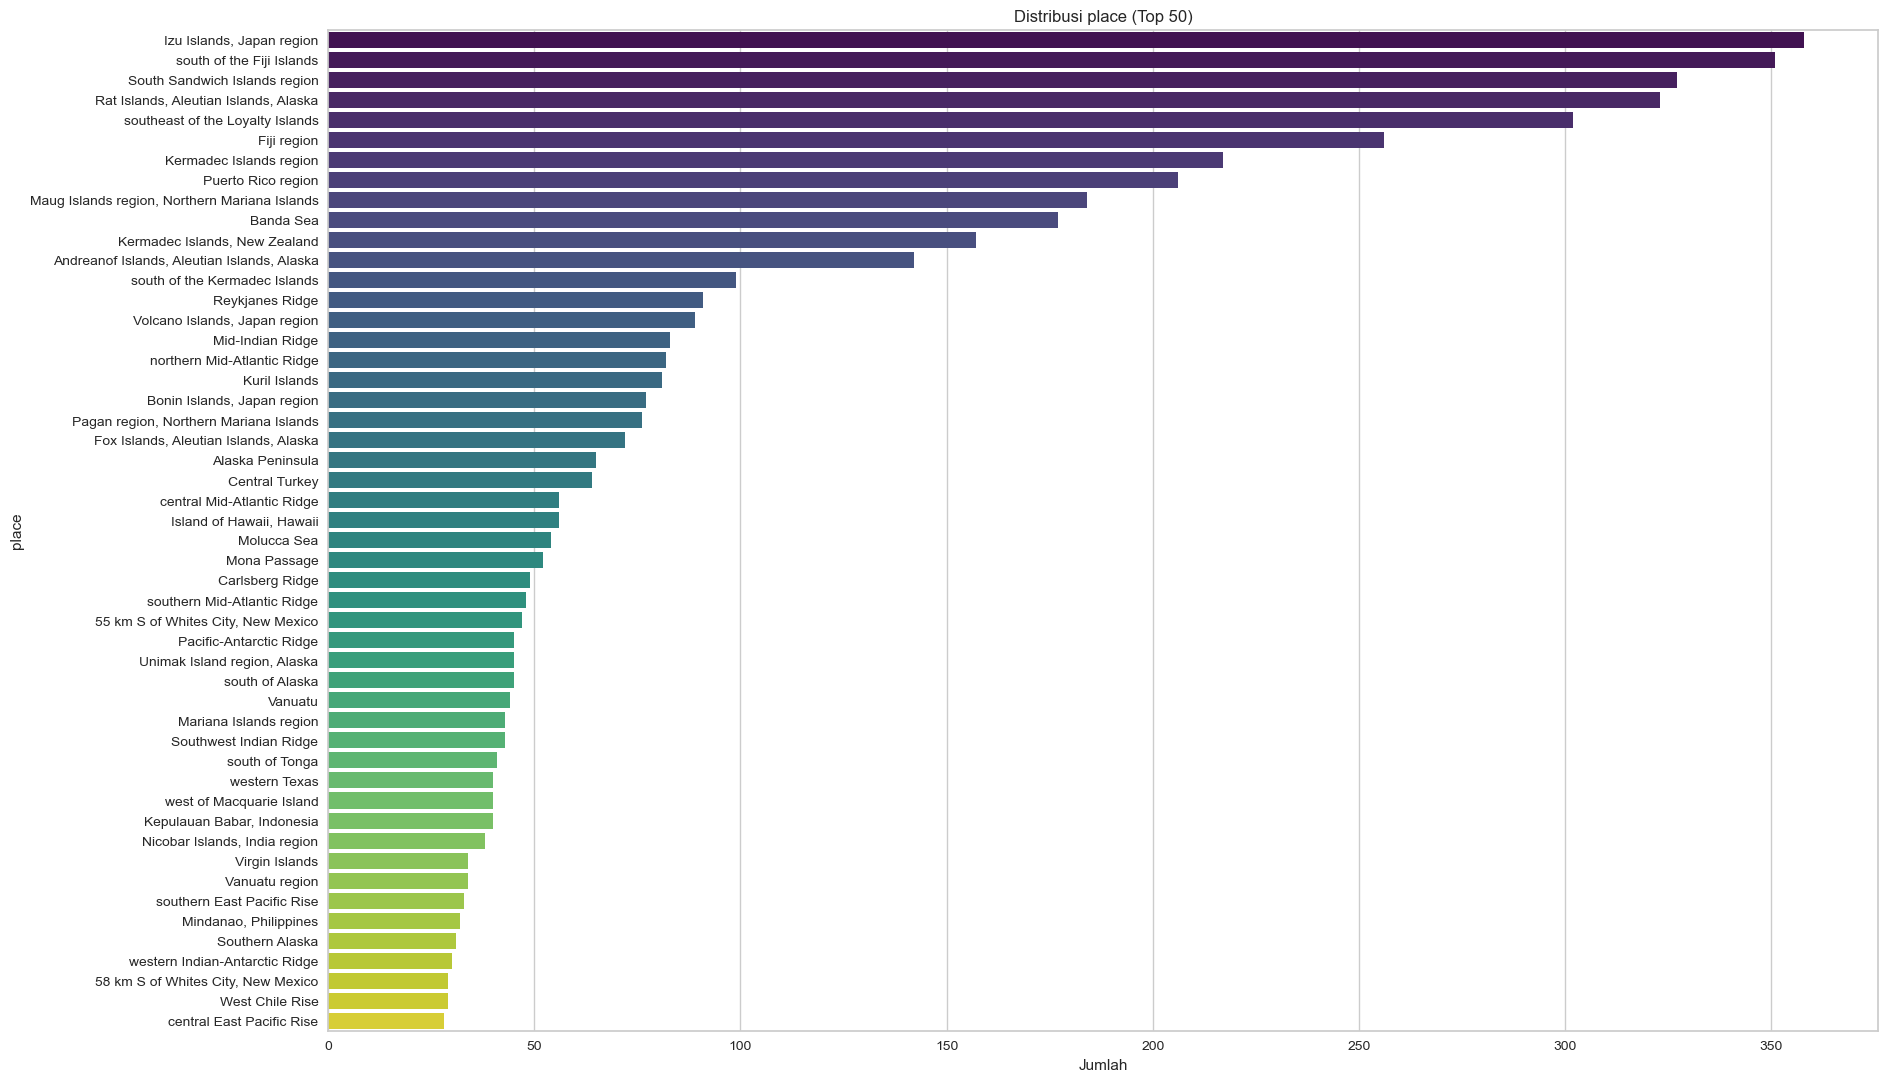

In [14]:
# Distribusi fitur kategorikal (place)
cat_features = ['place']
for feature in cat_features:
    plt.figure(figsize=(20, 13)) 
    top_values = df[feature].value_counts().nlargest(50)  # Ambil 50 kategori terbanyak
    sns.barplot(x=top_values.values, y=top_values.index, palette='viridis')  
    plt.title(f'Distribusi {feature} (Top 50)')
    plt.xlabel("Jumlah")
    plt.ylabel(feature)
    plt.show()

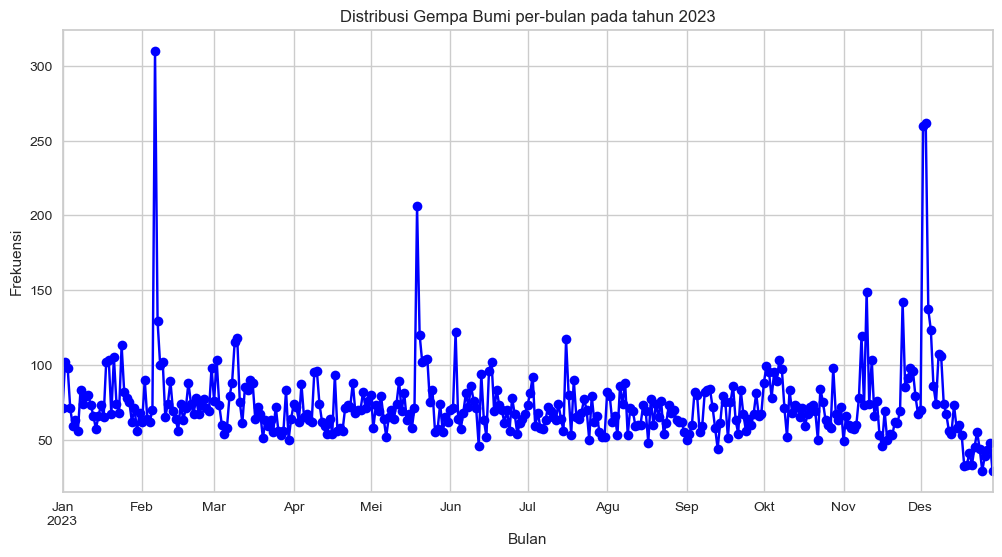

In [4]:
# Konversi kolom time ke tipe datetime dan ekstrak bulan
df['time'] = pd.to_datetime(df['time'])

# Plot distribusi gempa per bulan
jumlah = df.resample('D', on='time').size()
plt.figure(figsize=(12, 6))
jumlah.plot(kind='line', color='Blue', marker='o')
plt.title('Distribusi Gempa Bumi per-bulan pada tahun 2023')
plt.xlabel('Bulan')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

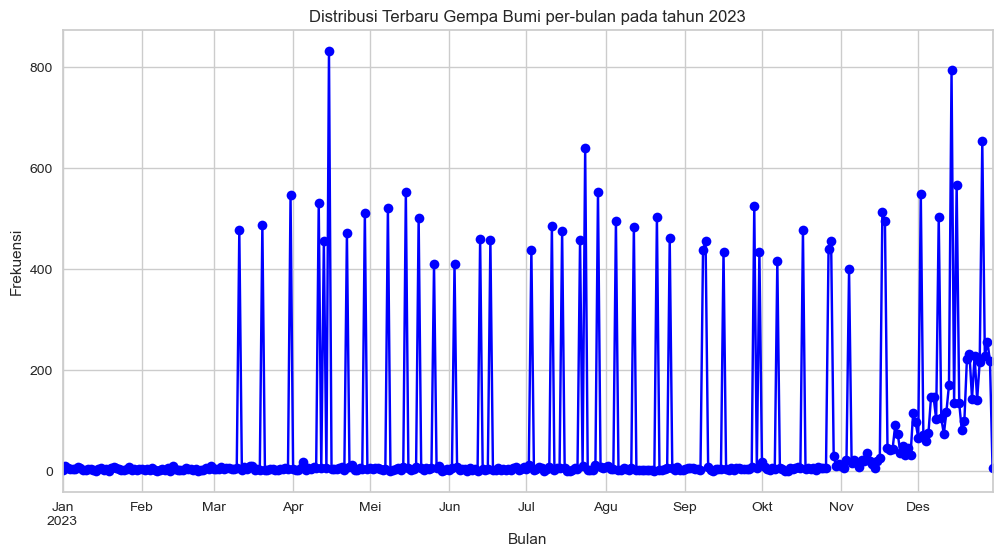

In [5]:
# Konversi kolom updated ke tipe datetime dan ekstrak bulan
df['updated'] = pd.to_datetime(df['updated'])

# Plot distribusi gempa per bulan
jumlah = df.resample('D', on='updated').size()
plt.figure(figsize=(12, 6))
jumlah.plot(kind='line', color='Blue', marker='o')
plt.title('Distribusi Terbaru Gempa Bumi per-bulan pada tahun 2023')
plt.xlabel('Bulan')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

In [6]:
# Mengidentifikasi duplikat data
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  1960


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [7]:
# Menghapus Data Duplikat
df = df.drop_duplicates()

# testing
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  0


In [9]:
# Memisahkan kolom yang memiliki missing value lebih dari 75% dan kurang dari 75%
less = missing_values[missing_values < 1500].index
over = missing_values[missing_values >= 1500].index

# Mengisi nilai yang hilang dengan median untuk kolom numerik
num_features = df[less].select_dtypes(include=['number']).columns
df[num_features] = df[num_features].fillna(df[num_features].median())

# # Mengisi nilai yang hilang dengan mode untuk kolom kategori
cat_features = df[less].select_dtypes(include=['object']).columns 
for column in cat_features:
    df[column] = df[column].fillna(df[column].mode()[0])

# Menghapus kolom dengan terlalu banyak nilai yang hilang
df = df.drop(columns=over)    

# testing
missing_values = df.isnull().sum()
missing_values[missing_values > 0]  

Series([], dtype: int64)

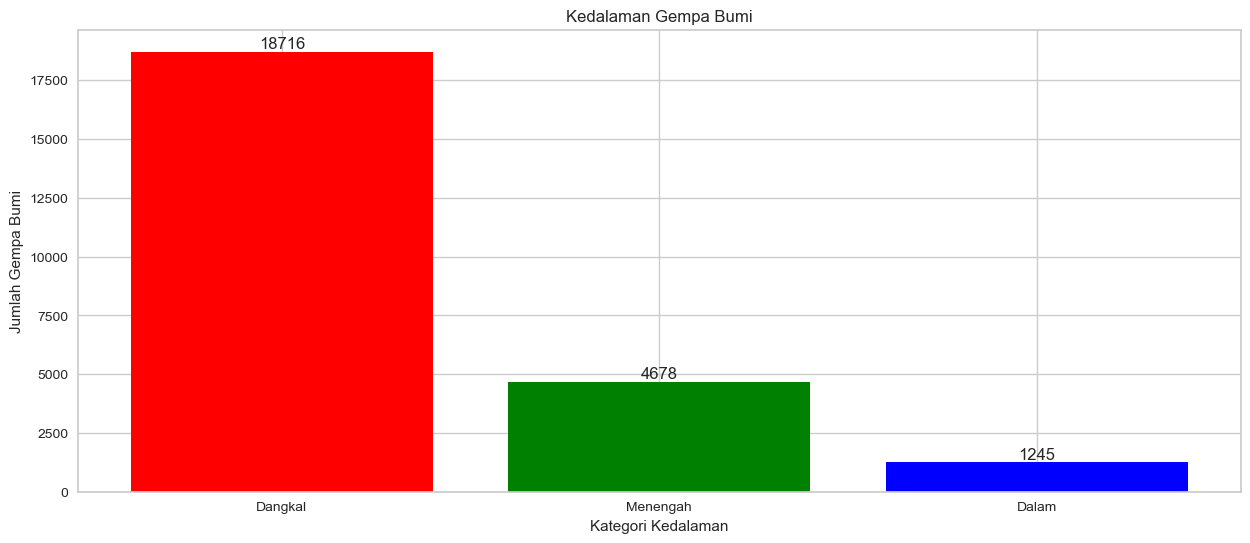

In [7]:
# Mengelompokkan kedalaman(depth) ke dalam kategori dan menghitung jumlah gempa bumi di setiap kategor
Dangkal = df.depth[(df.depth >= 0) & (df.depth <= 70)]
Menengah = df.depth[(df.depth > 70) & (df.depth <= 300)]
Dalam = df.depth[df.depth > 300]

# Menyusun data untuk plotting
x = ["Dangkal", "Menengah", "Dalam"]
y = [len(Dangkal.values), len(Menengah.values), len(Dalam.values)]

# Membuat bar chart untuk distribusi kedalaman gempa bumi
plt.figure(figsize=(15, 6))
plt.bar(x, y, color=['red', 'green', 'blue'])  
plt.title("Kedalaman Gempa Bumi")
plt.xlabel("Kategori Kedalaman")
plt.ylabel("Jumlah Gempa Bumi")

# Menambahkan label jumlah gempa bumi di atas setiap bar
for i in range(len(x)):
  plt.text(i, y[i], y[i], ha='center', va='bottom')

plt.show()

In [10]:
# Standardisasi fitur numerik
scaler = StandardScaler()
df[num_features] = scaler.fit_transform(df[num_features])

# testing
df.describe()

,latitude,longitude,depth,mag,nst,gap,rms,depthError
count,2.468200e+04,2.468200e+04,2.468200e+04,2.468200e+04,2.468200e+04,2.468200e+04,2.468200e+04,2.468200e+04
mean,1.309849e-16,-4.059093e-17,-2.072728e-17,-2.867274e-16,-2.360607e-17,1.957577e-16,1.617879e-16,-5.703601e-18
std,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00
min,-2.766214e+00,-1.264857e+00,-6.064362e-01,-1.683725e+00,-1.115270e+00,-1.755942e+00,-2.188133e+00,-9.837001e-01
25%,-7.891144e-01,-1.041547e+00,-4.910144e-01,-9.700099e-01,-6.070145e-01,-7.575207e-01,-6.739372e-01,-5.797921e-01
50%,3.868094e-02,-3.886581e-01,-3.874198e-01,2.851449e-01,-3.395116e-01,-2.061538e-01,2.492237e-02,-5.409379e-01
75%,8.514640e-01,1.096817e+00,-4.674175e-03,6.543081e-01,2.222447e-01,5.836419e-01,6.461309e-01,4.788747e-01
max,2.262869e+00,1.506119e+00,5.303708e+00,4.715103e+00,1.020011e+01,3.340476e+00,5.072242e+00,1.233429e+01


In [ ]:
# Mengubah data kategorikal menjadi numerik menggunakan OneHotEncoder
df = df.drop(columns=['id', 'place', 'time', 'updated'])  # Menghapus kolom yang tidak perlu diencoding karena memiliki banyak nilai unik
cat_features = df.select_dtypes(include=['object']).columns

# Menggunakan pd.get_dummies untuk One-Hot Encoding
df_one_hot = pd.get_dummies(df, columns=cat_features)

# Konversi boolean menjadi numerik (0 dan 1)
df_one_hot = df_one_hot.astype(int)

# Menampilkan hasil
df_one_hot

,latitude,longitude,depth,mag,nst,gap,rms,depthError,magType_mb,magType_mb_lg,...,magSource_ok,magSource_pgc,magSource_pr,magSource_se,magSource_slm,magSource_tx,magSource_us,magSource_uu,magSource_uw,magSource_zamg
0,1,1,0,-1,0,0,-1,3,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,1,-1,2,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,1,-1,0,-1,0,0,-1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26637,0,1,0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
26638,0,1,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
26639,0,0,0,1,0,-1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
26640,-1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

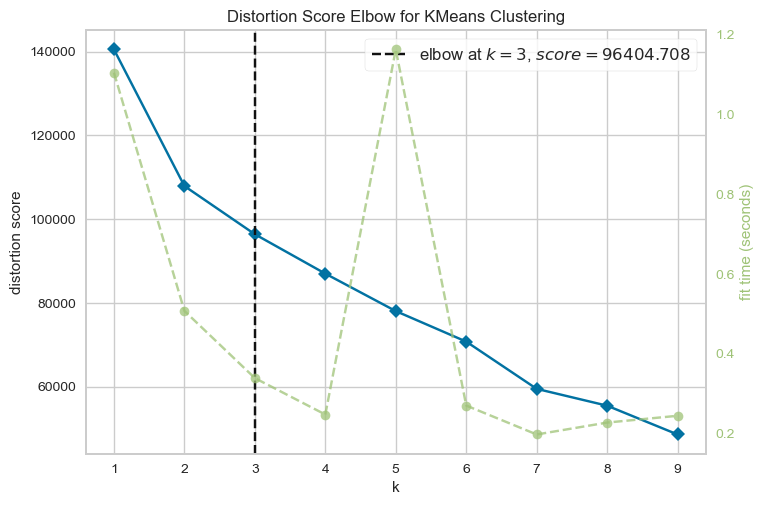

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [13]:
# karena menggunakan K-Means maka akan menentukan jumlah cluster optimal dengan metode Elbow 
# Inisialisasi model KMeans menggunakan parameter random_state untuk memastikan hasil yang konsisten
kmeans = KMeans(random_state=42)
 
# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))
 
# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(df_one_hot)
 
# Menampilkan grafik elbow untuk analisis
visualizer.show()

In [15]:
# Inisialisasi model dengan k=3 dan iterasi 2
kmeans = KMeans(n_clusters=3, random_state=42, n_init=2)

# Melatih model dengan data yang sudah di-encode dan distandarisasi
kmeans.fit(df_one_hot)

# Menambahkan hasil cluster ke dataframe
labels = kmeans.labels_
df_one_hot['cluster'] = labels

# Menampilkan hasil cluster pertama
df_one_hot.head()

,latitude,longitude,depth,mag,nst,gap,rms,depthError,magType_mb,magType_mb_lg,...,magSource_pgc,magSource_pr,magSource_se,magSource_slm,magSource_tx,magSource_us,magSource_uu,magSource_uw,magSource_zamg,cluster
0,1,1,0,-1,0,0,-1,3,0,0,...,0,0,0,0,0,1,0,0,0,1
1,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,1,-1,2,0,0,...,0,1,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,1,-1,0,-1,0,0,-1,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [18]:
# Menampilkan jumlah data di setiap cluster
df_one_hot['cluster'].value_counts()

cluster
0    14782
1     8747
2     1153
Name: count, dtype: int64

In [30]:
# Menampilkan rata-rata setiap cluster
df_one_hot.groupby('cluster').mean()

,latitude,longitude,depth,mag,nst,gap,rms,depthError,magType_mb,magType_mb_lg,...,magSource_ok,magSource_pgc,magSource_pr,magSource_se,magSource_slm,magSource_tx,magSource_us,magSource_uu,magSource_uw,magSource_zamg
cluster,,,,,,,,,,,,,,,,,,,,,
0,-0.235963,0.387769,0.065214,0.224462,0.300365,-0.142132,0.227642,0.069070,0.865986,0.003044,...,0.000000,0.000135,0.000000,0.0000,0.000474,0.000068,0.991003,0.000000,0.000000,0.000068
1,0.532868,-0.467703,0.009146,-0.685606,0.034755,0.537098,-0.402538,0.336115,0.013833,0.001715,...,0.004802,0.000457,0.206356,0.0008,0.000000,0.066308,0.402195,0.005145,0.004344,0.000000
2,-0.824805,-0.379011,3.448395,0.123157,0.307025,-0.269731,0.154380,0.477884,0.961839,0.000000,...,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [19]:
# Hitung silhouette score 
sil_score = silhouette_score(df_one_hot, labels)
print(f"Silhouette Score: {sil_score:.4f}")

Silhouette Score: 0.3563


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [20]:
# Menggunakan PCA untuk fiture selection
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_one_hot.drop(columns=['cluster']))

In [29]:
# Membuat DataFrame baru dengan hasil PCA dan label kluster
reduced_df = pd.DataFrame(reduced_data, columns=['PCA1', 'PCA2'])
reduced_df['cluster'] = labels  # Menambahkan label kluster
reduced_df.head()

,PCA1,PCA2,cluster
0,-1.173102,0.181098,1
1,0.732051,-0.407236,0
2,-1.752614,0.702642,1
3,0.386530,-0.098443,0
4,-1.504340,-0.183305,1


In [ ]:
# Rasio varians yang dijelaskan oleh komponen
print(pca.explained_variance_ratio_)

[0.27054268 0.12088163]


In [21]:
# Hitung silhouette score dengan data yang sudah direduksi
sil_score = silhouette_score(reduced_data, labels)
print(f"Silhouette Score: {sil_score:.4f}")

Silhouette Score: 0.6507


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

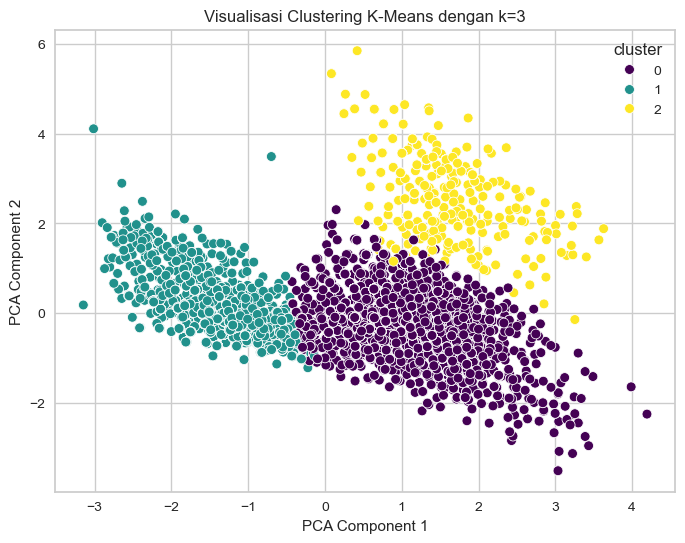

In [22]:
# Visualisasi hasil clustering menggunakan pca

plt.figure(figsize=(8, 6))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=df_one_hot['cluster'], palette="viridis", s=50)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Visualisasi Clustering K-Means dengan k=3")
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [45]:
# saya sudah menambahkan hasil label cluster ke dataframe df_one_hot, berikut adalah hasilnya
df_one_hot.info()
df_one_hot.head()

<class 'pandas.core.frame.DataFrame'>
Index: 24682 entries, 0 to 26641
Data columns (total 84 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   latitude                24682 non-null  int32
 1   longitude               24682 non-null  int32
 2   depth                   24682 non-null  int32
 3   mag                     24682 non-null  int32
 4   nst                     24682 non-null  int32
 5   gap                     24682 non-null  int32
 6   rms                     24682 non-null  int32
 7   depthError              24682 non-null  int32
 8   magType_mb              24682 non-null  int32
 9   magType_mb_lg           24682 non-null  int32
 10  magType_md              24682 non-null  int32
 11  magType_mh              24682 non-null  int32
 12  magType_ml              24682 non-null  int32
 13  magType_ml(texnet)      24682 non-null  int32
 14  magType_mlr             24682 non-null  int32
 15  magType_mlv             

,latitude,longitude,depth,mag,nst,gap,rms,depthError,magType_mb,magType_mb_lg,...,magSource_pgc,magSource_pr,magSource_se,magSource_slm,magSource_tx,magSource_us,magSource_uu,magSource_uw,magSource_zamg,cluster
0,1,1,0,-1,0,0,-1,3,0,0,...,0,0,0,0,0,1,0,0,0,1
1,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,1,-1,2,0,0,...,0,1,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,1,-1,0,-1,0,0,-1,0,0,0,...,0,0,0,0,0,1,0,0,0,1


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [ ]:
# Membuat salinan df agar tidak mengubah data aslinya
df_inverse = df.copy()

# Melakukan inverse transform hanya pada kolom numerik yang telah distandarisasi
df_inverse[num_features] = scaler.inverse_transform(df[num_features])

# Menggabungkan dengan cluster pada dataframe reduced_df
df_inverse['cluster'] = reduced_df['cluster'].values

df_inverse.info()
df_inverse.head()

<class 'pandas.core.frame.DataFrame'>
Index: 24682 entries, 0 to 26641
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   latitude        24682 non-null  float64
 1   longitude       24682 non-null  float64
 2   depth           24682 non-null  float64
 3   mag             24682 non-null  float64
 4   magType         24682 non-null  object 
 5   nst             24682 non-null  float64
 6   gap             24682 non-null  float64
 7   rms             24682 non-null  float64
 8   net             24682 non-null  object 
 9   type            24682 non-null  object 
 10  depthError      24682 non-null  float64
 11  status          24682 non-null  object 
 12  locationSource  24682 non-null  object 
 13  magSource       24682 non-null  object 
 14  cluster         24682 non-null  int32  
dtypes: float64(8), int32(1), object(6)
memory usage: 2.9+ MB


,latitude,longitude,depth,mag,magType,nst,gap,rms,net,type,depthError,status,locationSource,magSource,cluster
0,48435.219805,3.011136e+06,1.118421e+06,9.240327,ml,21164.842727,6.345161e+05,0.733255,us,earthquake,465.118755,reviewed,us,us,1
1,7123.906697,2.137101e+06,1.070439e+06,10.164884,mb,46319.319656,4.769038e+05,0.752493,us,earthquake,179.398026,reviewed,us,us,0
2,18171.509733,-1.124898e+06,3.298456e+05,9.788457,md,33742.081192,1.116359e+06,0.735908,pr,earthquake,355.898229,reviewed,pr,pr,1
3,-3828.688092,1.732514e+06,8.637075e+05,10.032804,mb,25357.255549,8.506702e+05,0.755146,us,earthquake,161.426342,reviewed,us,us,0
4,49626.590141,-2.819784e+06,1.419936e+05,9.174287,ml,28152.197430,8.641798e+05,0.741879,us,earthquake,66.379789,reviewed,us,us,1


In [51]:
# Pastikan index di reduced_df sama dengan df sebelum menggabungkan cluster
print(df.index.equals(reduced_df.index))  

False


In [52]:
df = df.sort_index()
reduced_df = reduced_df.sort_index()

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [38]:
# Membuat daftar nama fitur asli dari df_one_hot, kecuali kolom 'cluster'
feature_names = df_one_hot.drop(columns=['cluster']).columns.tolist()

# Menampilkan nama fitur asli
print(feature_names)

# Menggunakan pca.components_ untuk membuat DataFrame kontribusi
pca_components = pd.DataFrame(pca.components_, columns=feature_names, index=['PCA1', 'PCA2'])

# Menampilkan kontribusi fitur asli terhadap PCA1 dan PCA2
print(pca_components)

# Menghitung kontribusi absolut setiap fitur
pca_components_abs = pca_components.abs()

# Fitur dengan kontribusi terbesar untuk PCA1
top_features_pca1 = pca_components_abs.loc['PCA1'].nlargest(10)  # Ambil 10 fitur teratas untuk PCA1

# Fitur dengan kontribusi terbesar untuk PCA2
top_features_pca2 = pca_components_abs.loc['PCA2'].nlargest(10)  # Ambil 10 fitur teratas untuk PCA2

# Menampilkan hasil
print("Top features for PCA1:")
print(top_features_pca1)

print("Top features for PCA2:")
print(top_features_pca2)

['latitude', 'longitude', 'depth', 'mag', 'nst', 'gap', 'rms', 'depthError', 'magType_mb', 'magType_mb_lg', 'magType_md', 'magType_mh', 'magType_ml', 'magType_ml(texnet)', 'magType_mlr', 'magType_mlv', 'magType_ms_vx', 'magType_mw', 'magType_mwb', 'magType_mwc', 'magType_mwp', 'magType_mwr', 'magType_mww', 'net_ak', 'net_av', 'net_ci', 'net_hv', 'net_mb', 'net_nc', 'net_nm', 'net_nn', 'net_ok', 'net_pr', 'net_se', 'net_tx', 'net_us', 'net_uu', 'net_uw', 'type_Landslide', 'type_earthquake', 'type_explosion', 'type_ice quake', 'type_landslide', 'type_mining explosion', 'type_quarry blast', 'type_volcanic eruption', 'status_automatic', 'status_reviewed', 'locationSource_ak', 'locationSource_av', 'locationSource_ci', 'locationSource_dnk', 'locationSource_hv', 'locationSource_mb', 'locationSource_nc', 'locationSource_nm', 'locationSource_nn', 'locationSource_ok', 'locationSource_pr', 'locationSource_se', 'locationSource_tx', 'locationSource_us', 'locationSource_uu', 'locationSource_uw', 'ma

In [31]:
# Menghitung rata-rata tiap kluster untuk data hasil pca
reduced_df.groupby('cluster').mean()

,PCA1,PCA2
cluster,,
0,0.813027,-0.204023
1,-1.537426,-0.039894
2,1.239984,2.918314


Tulis hasil interpretasinya di sini.
## Cluster 1:
- **Rata-rata PCA1:** 0.813
- **Rata-rata PCA2:** -0.204 
- **Analisis:**  Nilai PCA1 positif cukup tinggi menunjukkan bahwa cluster ini lebih dominan dibandingkan cluster lain. Kemungkinan mencakup gempa dengan magnitudo sedang hingga tinggi yang tersebar luas secara geografis. Bisa jadi ini adalah kategori gempa utama yang perlu lebih diperhatikan dalam sistem pemantauan.

## Cluster 2:
- **Rata-rata PCA1:** -1.537
- **Rata-rata PCA2:** -0.039
- **Analisis:**  Nilai PCA1 yang paling negatif menunjukkan bahwa cluster ini lebih rendah dibandingkan cluster lainnya. Kemungkinan  terdiri dari gempa bumi dengan magnitudo rendah, mungkin lebih kecil dari gempa yang termasuk dalam cluster 0. Karena nilai PCA2 juga tidak jauh berbeda dari nol, kemungkinan tidak ada pola kedalaman yang mencolok dalam cluster ini. Bisa jadi Gempa-gempa dalam cluster ini mungkin lebih sering terjadi tetapi dengan dampak yang lebih kecil.

## Cluster 3:
- **Rata-rata PCA1:** 1.239
- **Rata-rata PCA2:** 2.918
- **Analisis:**  Nilai PCA1 dan PCA2 yang sangat tinggi menunjukkan bahwa cluster ini sangat dipengaruhi oleh fitur depth (kedalaman), magnitudo, latitude, dan longitude. Cluster ini kemungkinan terdiri dari gempa bumi dengan kedalaman sangat tinggi, dengan kemungkinan magnitudo yang tinggi, berbeda dari dua cluster lainnya. Ada kemungkinan cluster ini mencakup gempa dalam berkekuatan tinggi yang terjadi di kedalaman signifikan. cluster ini mungkin memerlukan perhatian berbeda dari gempa di cluster lain.

# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Annual Income (k$):** 48,260  
- **Rata-rata Spending Score (1-100):** 56.48  
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

## Cluster 2:
- **Rata-rata Annual Income (k$):** 86,540  
- **Rata-rata Spending Score (1-100):** 82.13  
- **Analisis:** Cluster ini menunjukkan pelanggan dengan pendapatan tahunan tinggi dan pengeluaran yang sangat tinggi. Pelanggan di cluster ini merupakan kelompok premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.

## Cluster 3:
- **Rata-rata Annual Income (k$):** 87,000  
- **Rata-rata Spending Score (1-100):** 18.63  
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang tinggi tetapi pengeluaran yang rendah. Mereka mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.